# Optimization Methods for Data Science (Project)

##### Authors: Mojtaba Amini , Kamile Dementaviciute, Saeed Soufeh

##### Implemetation of SFW, MSFW and SVRF for a Neural Network
##### Deadline: 25/06/2022

In [104]:
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np
np.random.seed(123)
from sklearn.model_selection import train_test_split
import seaborn as sns
import random 
import math
from sklearn.model_selection import train_test_split
import time
import pathlib
# from keras.datasets import reuters
from keras.datasets import cifar10
import cv2

#from Funct import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

###Load Dataset


In [105]:
def load_data(data_type="Simple"):

  random.seed(30)

  if data_type=="Simple":
    X, Y = datasets.make_classification(n_samples=8000, n_features=2, random_state=123, n_redundant= 0, scale=20, shift=10)
    X = X*0.1 # just to reduce the order of values

    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 123) 

    shape_X = X.shape
    shape_Y = Y.shape
    m = (X.size)/shape_X[1] 

    print ('The shape of X is: ' + str(shape_X))
    print ('The shape of Y is: ' + str(shape_Y))
    print ('We have m = %d training examples!' % (m))
    print(f"Train size of X= {X_train.shape[0]}\tTest size = {X_test.shape[0]}")
    #Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][Y == 0], X[:, 1][Y == 0], 'r^')
    plt.plot(X[:, 0][ Y== 1], X[:, 1][Y == 1], 'bs')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title('Random Classification Data with 2 classes')


  elif data_type=="mnist":
    
    (x_train_full, y_tr), (x_te, y_te) = tf.keras.datasets.mnist.load_data()
    # Rescale the pixel values
    x_train_full = x_train_full.astype('float32') / 255
    x_te = x_te.astype('float32') / 255
    # Flatten the arrays
    x_tr = x_train_full.reshape((len(x_train_full), np.prod(x_train_full.shape[1:])))
    x_te = x_te.reshape((len(x_te), np.prod(x_te.shape[1:])))
    y_train = y_tr[(y_tr==0) | (y_tr==1)]
    x_train = x_tr[(y_tr==0) | (y_tr==1)]
    y_test = y_te[(y_te==0) | (y_te==1)]
    x_test = x_te[(y_te==0) | (y_te==1)]
    n=10
    print(f"Train size of X= {x_train.shape[0]}\tTest size = {x_test.shape[0]}")
    plt.figure(figsize=(20, 4))
    for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.savefig("mnist.png",dpi=300)
    plt.show()


  

  elif data_type=="fashion mnist":
    
    (x_train_full, y_tr), (x_te, y_te) = tf.keras.datasets.fashion_mnist.load_data()
    # Rescale the pixel values
    x_train_full = x_train_full.astype('float32') / 255
    x_te = x_te.astype('float32') / 255
    # Flatten the arrays
    x_tr = x_train_full.reshape((len(x_train_full), np.prod(x_train_full.shape[1:])))
    x_te = x_te.reshape((len(x_te), np.prod(x_te.shape[1:])))
    y_train = y_tr[(y_tr==0) | (y_tr==1)]
    x_train = x_tr[(y_tr==0) | (y_tr==1)]
    y_test = y_te[(y_te==0) | (y_te==1)]
    x_test = x_te[(y_te==0) | (y_te==1)]
    n=10
    print(f"Train size of X= {x_train.shape[0]}\tTest size = {x_test.shape[0]}")
    plt.figure(figsize=(20, 4))
    for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.savefig("fashion_mnist.png",dpi=300)
    plt.show()



  elif data_type=="cifar10":
    
    (x_train_full, y_tr), (x_te, y_te) = cifar10.load_data()

    x_train_full = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train_full])
    x_te = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_te])

    # Rescale the pixel values
    x_train_full = x_train_full.astype('float32') / 255
    x_te = x_te.astype('float32') / 255

    
    # Flatten the arrays
    x_tr = x_train_full.reshape((len(x_train_full), np.prod(x_train_full.shape[1:])))
    x_te = x_te.reshape((len(x_te), np.prod(x_te.shape[1:])))

    y_tr = y_tr.T[0]
    y_te = y_te.T[0]

    y_train = y_tr[(y_tr==7) | (y_tr==1)]
    x_train = x_tr[(y_tr==7) | (y_tr==1)]
    y_test = y_te[(y_te==7) | (y_te==1)]
    x_test = x_te[(y_te==7) | (y_te==1)]
    n=10
    print(f"Train size of X= {x_train.shape[0]}\tTest size = {x_test.shape[0]}")
    plt.figure(figsize=(20, 4))
    for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(32, 32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.savefig("cifar10.png",dpi=300)
    plt.show()




  elif data_type=="flowers":

    dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
    data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
    data_dir = pathlib.Path(data_dir)
    
    train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,seed=123,subset="training",image_size=(180, 180), batch_size=None)
    val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,seed=123,subset="validation",image_size=(180, 180), batch_size=None)


    x_train_full = []
    y_tr = []
    x_te = []
    y_te = []

    for x, y in train_ds:
      a = x.numpy().astype("uint8")
      b = y.numpy().astype("int")
      x_train_full.append(a)
      y_tr.append(b)

    for x, y in val_ds:
      a = x.numpy().astype("uint8")
      b = y.numpy().astype("int")
      x_te.append(a)
      y_te.append(b)

    x_train_full = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train_full])
    x_te = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_te])

    x_train_full = np.asarray(x_train_full)
    x_te = np.asarray(x_te)
    y_tr = np.asarray(y_tr)
    y_te = np.asarray(y_te)

    # Rescale the pixel values
    x_train_full = x_train_full.astype('float32') / 255
    x_te = x_te.astype('float32') / 255


    # Flatten the arrays
    x_tr = x_train_full.reshape((len(x_train_full), np.prod(x_train_full.shape[1:])))
    x_te = x_te.reshape((len(x_te), np.prod(x_te.shape[1:])))



    y_train = y_tr[(y_tr==0) | (y_tr==1)]
    x_train = x_tr[(y_tr==0) | (y_tr==1)]
    y_test = y_te[(y_te==0) | (y_te==1)]
    x_test = x_te[(y_te==0) | (y_te==1)]
    n=10
    print(f"Train size of X= {x_train.shape[0]}\tTest size = {x_test.shape[0]}")
    plt.figure(figsize=(20, 4))
    for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(180,180))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

    plt.savefig("flowers.png",dpi=300)  
    plt.show()

  elif data_type=="tweets":

    import nltk
    import pandas as pd
    import re
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.model_selection import train_test_split
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    import nltk
    nltk.download('punkt')
    from nltk.tokenize import word_tokenize
    from PIL import Image
    from sklearn.preprocessing import StandardScaler
    from sklearn import feature_extraction, linear_model, model_selection, preprocessing
    def cleanend_data(text):
    # Use a breakpoint in the code line below to debug your script.
      text = text.lower()
      re.sub(r'http\S+', '', text)

      text_tokens = word_tokenize(text)
      all_stopwords = stopwords.words('english')
      more_stop=["https","tco","via","s","rt","st","w","im","re","m","d","v","a","b","c","e","f",
               "g","h","lol","l","n","o","p","k","q","r","s","t","u","v","w","ll","ve","tco","nt"]
      all_stopwords.extend(more_stop)
      tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
      text = (" ").join(tokens_without_sw)
      text = re.sub('#><=', '', text)
      text = re.sub('[0-9]+', '', text)
      text = re.sub('[\,]', '', text)
      text = re.sub('[\#]', '', text)
      text = re.sub('[\'\"]', '', text)
      text = re.sub('[\.\$\@\!\*\&\?\_\__]', '', text)

      return text
    data_url = 'https://www.math.unipd.it/~dasan/disaster/'
    raw_data = pd.read_csv(data_url + 'train.csv', sep=",") 
    test_data = pd.read_csv(data_url + 'test.csv', sep=",") 
    raw_data['text_clean'] = raw_data.text.map(cleanend_data)
    del raw_data['text']
    del raw_data['id']
    del raw_data['location']
    del raw_data['keyword']
    y_data = raw_data['target'].copy()
    del raw_data['target']
    X_train_t, X_val_t, y_train, y_test = train_test_split(raw_data, y_data, train_size=0.75, random_state=123)
    cv = CountVectorizer(stop_words="english",min_df=4)
    X = cv.fit_transform(X_train_t.text_clean)
    x_train= X.toarray()
    X_val = cv.transform(X_val_t.text_clean)
    x_test=X_val.toarray()

  elif data_type=="moon":

    import sklearn.datasets
    from sklearn.model_selection import train_test_split
    X,Y = sklearn.datasets.make_moons(n_samples=15000, noise=.2)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=123)
 
  elif data_type=="circle":
    import sklearn.datasets
    from sklearn.model_selection import train_test_split
    X,Y = sklearn.datasets.make_circles(n_samples=15000, noise=.2)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=123)

  elif data_type=="gaussian":

    import sklearn.datasets
    from sklearn.model_selection import train_test_split
    X,Y = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=15000, n_features=2, n_classes=2, shuffle=True, random_state=None)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=123)



  return x_train,y_train,x_test,y_test

###Required Functions

In [106]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    
    return 1/(1+np.exp(-z))
    
def relu(x):

    return np.maximum(0.0, x)

    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X

In [107]:
def predict(X, y, parameters):
    
    m = X.shape[0]
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = forward_propagation(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    p = np.sum((p == y)/m)
        
    return p

###Building Neural Network with one layer

Lets define the neural network. 

####Defining the neural network structure

    
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    

In [108]:
def layer_sizes(X, Y, hidden_units = 16):

  n_x = X.shape[1] # size of input layer
  n_h = hidden_units # we have 3 hidden units
  n_y = 1 # size of output layer
    
  return (n_x, n_h, n_y)


    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing the parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
   

In [109]:
def initialize_parameters(n_x, n_h, n_y):

  np.random.seed(2) 
  W1 = np.random.randn(n_h,n_x) * 0.001
  b1 = np.zeros((n_h,1))
  W2 = np.random.randn(n_y,n_h) * 0.0001
  b2 = np.zeros((n_y,1))
  
  parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
  return parameters


    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing the parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"


In [110]:
def forward_propagation(X, parameters, activation="tanh"):

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  Z1 = np.dot(W1,X.T) + b1
  if activation=="relu":
    A1 = relu(Z1)
  elif activation=="tanh":
    A1 = np.tanh(Z1)
  Z2 = np.dot(W2,A1) + b2
  A2 = sigmoid(Z2)
  # Values needed in the backpropagation are stored in "cache". This will be given as an input to the backpropagation
  cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
  return A2, cache

 
    Computes the cross-entropy cost 
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy

The cost funcion is : $$J= -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) $$


In [111]:
def compute_cost(A2, Y):

  m = Y.shape[0] # number of example
  # Compute the cross-entropy cost
  logprobs = np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
  cost = (-1/m) * np.sum(logprobs)  
  cost = float(np.squeeze(cost))  
  
  return cost


    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters


In [112]:
def backward_propagation(parameters, cache, X, Y,activation="tanh"):

  m = X.shape[0]
  # First, retrieve W1 and W2 from the dictionary "parameters".
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  
  # Retrieve also A1 and A2 from dictionary "cache".
  A1 = cache["A1"]
  A2 = cache["A2"]
  Z1 = cache["Z1"]
  Z2 = cache["Z2"]

  # Backward propagation: calculate dW1, db1, dW2, db2. 
  dZ2 = A2 - Y
  dW2 = (1/m) * np.dot(dZ2,A1.T)
  db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
  dA1 = np.dot(W2.T,dZ2) 
  
  if activation=="relu":
    dZ1 = np.array(dA1, copy=True)
    dZ1[Z1 <= 0] = 0 # gradient of relu
  elif activation=="tanh":
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))

  dW1 = (1/m) *(np.dot(dZ1,X))
  db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
  grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}

  return grads

###Simple FW finding direction implementation

In [113]:
def Simple_FW_find_direction(grads, grads_hat, m_grads , m = False):



  if m == False:
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
  elif m == True:
    dW1 = m_grads["m_dW1"]
    db1 = m_grads["m_db1"]
    dW2 = m_grads["m_dW2"]
    db2 = m_grads["m_db2"]

  dW1_hat = grads_hat["dW1_hat"]
  db1_hat = grads_hat["db1_hat"]
  dW2_hat = grads_hat["dW2_hat"]
  db2_hat = grads_hat["db2_hat"]


  arg = np.unravel_index(np.abs(dW1).argmax(), dW1.shape)
  dW1_hat[arg[0]][arg[1]]=np.sign(-dW1[arg[0]][arg[1]])

  arg = np.unravel_index(np.abs(dW2).argmax(), dW2.shape)
  dW2_hat[arg[0]][arg[1]]=np.sign(-dW2[arg[0]][arg[1]])

  arg = np.unravel_index(np.abs(db1).argmax(), db1.shape)
  db1_hat[arg[0]][arg[1]]=np.sign(-db1[arg[0]][arg[1]])

  arg = np.unravel_index(np.abs(db2).argmax(), db2.shape)
  db2_hat[arg[0]][arg[1]]=np.sign(-db2[arg[0]][arg[1]])

  Mgrads = {"dW1_hat": dW1_hat,"dW2_hat": dW2_hat,"db1_hat": db1_hat,"db2_hat": db2_hat}

  return Mgrads


    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 


In [114]:
def update_parameters(parameters, Mgrads, learning_rate):

  # Retrieve each parameter from the dictionary "parameters"
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]    
  # Retrieve each gradient from the dictionary "grads"
  dW1_hat = Mgrads["dW1_hat"]
  db1_hat = Mgrads["db1_hat"]
  dW2_hat = Mgrads["dW2_hat"]
  db2_hat = Mgrads["db2_hat"]
  # Update rule for each parameter
  W1 = W1 + learning_rate * (dW1_hat - W1)
  b1 = b1 + learning_rate * (db1_hat - b1)
  W2 = W2 + learning_rate * (dW2_hat - W2)
  b2 = b2 + learning_rate * (db2_hat - b2)
  parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
  return parameters

### Kamile SVRF finding direction implementation



In [115]:
def SVRF(grads, t, X, Y, param, grads_hat):

  random.seed(117)

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  dW1_hat=np.zeros(dW1.shape)
  dW2_hat=np.zeros(dW2.shape)
  db1_hat=np.zeros(db1.shape)
  db2_hat=np.zeros(db2.shape)  
  grads_hat = {"dW1_hat": dW1_hat,"db1_hat": db1_hat,"dW2_hat": dW2_hat,"db2_hat": db2_hat}

  dW1_av = np.zeros(dW1.shape)
  dW2_av = np.zeros(dW2.shape)
  db1_av = np.zeros(db1.shape)
  db2_av = np.zeros(db2.shape)

  m_dW1=np.zeros(dW1.shape)
  m_dW2=np.zeros(dW2.shape)
  m_db1=np.zeros(db1.shape)
  m_db2=np.zeros(db2.shape)  
  m_grads = {"m_dW1": m_dW1,"m_db1": m_db1,"m_dW2": m_dW2,"m_db2": m_db2}

  param_0 = param.copy()

  batch_size = 50 #i+1

  for k in range(0, 50):

    sample_data = random.sample(range(X.shape[0]), batch_size)
    X_batch = X[sample_data,:]
    Y_batch = Y[sample_data]

    dW1_av.fill(0)
    dW2_av.fill(0)
    db1_av.fill(0)
    db2_av.fill(0)

    for s in range(0, batch_size):

      '''getting single sample'''
      sample_data = random.sample(range(X_batch.shape[0]), 1)
      X_sample = X_batch[sample_data,:]
      Y_sample = Y_batch[sample_data]
      
      '''grad with old param'''
      A2, cache = forward_propagation(X_sample, param_0)
      stoch_grad_old = backward_propagation(param_0, cache, X_sample, Y_sample)

      '''grad with new param'''
      A2, cache = forward_propagation(X_sample, param)
      stoch_grad_new = backward_propagation(param, cache, X_sample, Y_sample)

      dW1_new = stoch_grad_new["dW1"]
      db1_new = stoch_grad_new["db1"]
      dW2_new = stoch_grad_new["dW2"]
      db2_new = stoch_grad_new["db2"]

      dW1_old = stoch_grad_old["dW1"]
      db1_old = stoch_grad_old["db1"]
      dW2_old = stoch_grad_old["dW2"]
      db2_old = stoch_grad_old["db2"]

      dW1_av += 1/batch_size*(dW1_new - dW1_old)
      db1_av += 1/batch_size*(db1_new - db1_old)
      dW2_av += 1/batch_size*(dW2_new - dW2_old)
      db2_av += 1/batch_size*(db2_new - db2_old)


    # L = L(x_0) + av(x_jk - loss_x_0)
    dW1_k = dW1 + dW1_av
    db1_k = db1 + db1_av
    dW2_k = dW2 + dW2_av
    db2_k = db2 + db2_av

    av_grads = {"dW1": dW1_k,"db1": db1_k,"dW2": dW2_k,"db2": db2_k}

    Mgrads = Simple_FW_find_direction(av_grads, grads_hat , m_grads)
    grads_hat = Mgrads
    

    learning_rate = 2/(k+1)
    param = update_parameters(param, Mgrads, learning_rate)


  return param


###Neural Network Model

In [116]:
# NN_model
def nn_model(X, Y, n_h, x_test, y_test, learning_r=0.01, momentum = 0.9, num_iterations = 10000, print_cost=False,activation="tanh", FW_Method = "simple", batch_size= 20 ,hidden_units = 16):
  
  n_x,n_h,n_y=layer_sizes(X, Y, hidden_units = hidden_units )


  # Initialize parameters
  parameters = initialize_parameters(n_x, n_h, n_y)
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"] 

  dW1_hat=np.zeros(W1.shape)
  dW2_hat=np.zeros(W2.shape)
  db1_hat=np.zeros(b1.shape)
  db2_hat=np.zeros(b2.shape)  
  grads_hat = {"dW1_hat": dW1_hat,"db1_hat": db1_hat,"dW2_hat": dW2_hat,"db2_hat": db2_hat}

  
  m_dW1=np.zeros(W1.shape)
  m_dW2=np.zeros(W2.shape)
  m_db1=np.zeros(b1.shape)
  m_db2=np.zeros(b2.shape)  
  m_grads = {"m_dW1": m_dW1,"m_db1": m_db1,"m_dW2": m_dW2,"m_db2": m_db2}


  # Loop (gradient descent)
  plot_cost=[]
  nog = [] #no of grads calculated
  acc = []
  CPU = []

  start_time = time.time()

  for i in range(0, num_iterations):

    
    if FW_Method=="Simple":

      # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
      A2, cache = forward_propagation(X, parameters , activation=activation)
      # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
      cost = compute_cost(A2, Y)
      # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
      grads = backward_propagation(parameters, cache, X, Y)
      Mgrads = Simple_FW_find_direction(grads, grads_hat , m_grads)
      grads_hat = Mgrads

  

    elif FW_Method=="SFW":

      batch_size = 50 #(i+1)**2 if (i+1)**2 < len(Y) else len(Y)
      sample_data = random.sample(range(X.shape[0]), batch_size)
      X_batch = X[sample_data,:]
      Y_batch = Y[sample_data]
      A2, cache = forward_propagation(X_batch, parameters)
      cost = compute_cost(A2, Y_batch)
      grads = backward_propagation(parameters, cache, X_batch, Y_batch)
      Mgrads = Simple_FW_find_direction(grads, grads_hat , m_grads)
      grads_hat = Mgrads

  
      
    elif FW_Method=="MSFW":
      
      batch_size = 50 #(i+1)**2 if (i+1)**2 < len(Y) else len(Y)
      sample_data = random.sample(range(X.shape[0]), batch_size)
      X_batch = X[sample_data,:]
      Y_batch = Y[sample_data]
      A2, cache = forward_propagation(X_batch, parameters)
      cost = compute_cost(A2, Y_batch)
      grads = backward_propagation(parameters, cache, X_batch, Y_batch)
      dW1 = grads["dW1"]
      db1 = grads["db1"]
      dW2 = grads["dW2"]
      db2 = grads["db2"]
      m_dW1 = (1-momentum)*m_dW1 + momentum * dW1
      m_db1 = (1-momentum)*m_db1 + momentum * db1
      m_dW2 = (1-momentum)*m_dW2 + momentum * dW2
      m_db2 = (1-momentum)*m_db2 + momentum * db2
      m_grads = {"m_dW1": m_dW1,"m_db1": m_db1,"m_dW2": m_dW2,"m_db2": m_db2}

      Mgrads = Simple_FW_find_direction(grads, grads_hat , m_grads , m = True)
      grads_hat = Mgrads

  

    elif FW_Method=="SVRF":
      A2, cache = forward_propagation(X, parameters)
      cost = compute_cost(A2, Y)
      grads = backward_propagation(parameters, cache, X, Y)

      param = SVRF(grads, i, X, Y, parameters, grads_hat)
      parameters = param.copy()



      
    # Update rule for each parameter
    if FW_Method=="SFW" or FW_Method=="MSFW" or FW_Method=="Simple":
      learning_rate = 2/(i+1)
      parameters = update_parameters(parameters, Mgrads, learning_rate)



    # If print_cost=True, Print the cost every n iterations
    if print_cost and i % 1 == 0:
      plot_cost.append(cost)
      acc.append(predict(x_test, y_test, parameters))
      CPU.append(time.time() - start_time )
      if FW_Method=="SVRF":
        # nog.append(((i+1)*50) + (i+1))
        nog.append((len(Y) + 50*50) if (nog==[]) else (nog[-1] + len(Y) + 50*50))
      else:
        nog.append((batch_size) if (nog==[]) else (nog[-1] + batch_size ))



    if print_cost and (i+1) % 10 == 0:
      print ("Cost after iteration %i: %f" %(i+1, cost))
    # Returns parameters learnt by the model. They can then be used to predict output



  return parameters, plot_cost, nog, acc, CPU 

### Train SFW

In [126]:
it = 50
hidden = 64

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Train size of X= 1226	Test size = 305


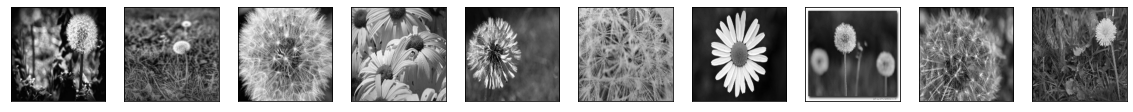

Cost after iteration 10: 0.686613
Cost after iteration 20: 0.673391
Cost after iteration 30: 0.693629
Cost after iteration 40: 0.703582
Cost after iteration 50: 0.692501
Accuracy:  0.6229508196721312


In [127]:
#SFW

x_train,y_train,x_test,y_test=load_data(data_type="flowers")
parameters_SFW,plot_cost_SFW, nog_SFW, acc_SFW, time_SFW = nn_model(x_train, y_train, 3, x_test, y_test, num_iterations=it, print_cost=True,activation="relu",FW_Method = "SFW",batch_size= 50, hidden_units = hidden)

print("============================")
p = predict(x_test, y_test, parameters_SFW)
print("Accuracy: ", p)
print("============================")


###Train MSFW

In [128]:
#MSFW

# x_train,y_train,x_test,y_test=load_data(data_type="mnist")

parameters_MSFW, plot_cost_MSFW, nog_MSFW, acc_MSFW, time_MSFW = nn_model(x_train, y_train, 3, x_test, y_test, num_iterations=it, print_cost=True,activation="relu",FW_Method = "MSFW",batch_size= 50, hidden_units = hidden)

print("============================")
p = predict(x_test, y_test, parameters_MSFW)
print("Accuracy: ", p)
print("============================")

Cost after iteration 10: 0.686904
Cost after iteration 20: 0.695517
Cost after iteration 30: 0.644957
Cost after iteration 40: 0.640459
Cost after iteration 50: 0.706744
Accuracy:  0.6032786885245902


###Train SVRF

In [129]:
#SVRF

# x_train,y_train,x_test,y_test=load_data(data_type="mnist")

parameters_SVRF, plot_cost_SVRF, nog_SVRF, acc_SVRF, time_SVRF = nn_model(x_train, y_train, 3, x_test, y_test, learning_r=0.03, num_iterations=it, print_cost=True,activation="relu",FW_Method = "SVRF",batch_size= 50, hidden_units = hidden)

print("============================")
p = predict(x_test, y_test, parameters_SVRF)
print("Accuracy: ", p)
print("============================")


Cost after iteration 10: 0.678591


KeyboardInterrupt: ignored

### Train FW

In [ ]:
#SFW

# x_train,y_train,x_test,y_test=load_data(data_type="mnist")
parameters_FW,plot_cost_FW, nog_FW, acc_FW, time_FW = nn_model(x_train, y_train, 3, x_test, y_test, num_iterations=it, print_cost=True,activation="relu",FW_Method = "Simple",batch_size= 50, hidden_units = hidden)

print("============================")
p = predict(x_test, y_test, parameters_FW)
print("Accuracy: ", p)
print("============================")


##Plots

###Loss

In [ ]:
# Importing libraries
import math
  
X = np.linspace(1,len(plot_cost_SVRF),len(plot_cost_SVRF))
  
# Assign variables to the y axis part of the curve
y = plot_cost_SVRF
z = plot_cost_SFW
w = plot_cost_MSFW
  
# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='SVRF')
plt.plot(X, z, color='g', label='SFW')
plt.plot(X, w, color='b', label='MSFW')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of Iterations")
plt.ylabel("Training Loss")
plt.title("")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

plt.savefig("Training loss VS epochs MNIST_1.png",dpi=300)
  
# To load the display window
plt.show()

In [ ]:

# Assign variables to the y axis part of the curve
y = plot_cost_SVRF
z = plot_cost_SFW
w = plot_cost_MSFW

  
# Plotting both the curves simultaneously
plt.plot(nog_SVRF, y, color='r', label='SVRF')
plt.plot(nog_SFW, z, color='g', label='SFW')
plt.plot(nog_MSFW, w, color='b', label='MSFW')
# plt.ylim(0, 0.4)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of gradients generated")
plt.ylabel("Training Loss")
plt.title("")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

plt.savefig("Training loss VS no of gradients generated MNIST_1.png",dpi=300)
  
# To load the display window
plt.show()

In [ ]:

# Assign variables to the y axis part of the curve
y = plot_cost_SVRF
z = plot_cost_SFW
w = plot_cost_MSFW

  
# Plotting both the curves simultaneously
plt.plot(time_SVRF, y, color='r', label='SVRF')
plt.plot(time_SFW, z, color='g', label='SFW')
plt.plot(time_MSFW, w, color='b', label='MSFW')
# plt.ylim(0, 0.4)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("CPU time")
plt.ylabel("Training Loss")
plt.title("")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

plt.savefig("Training loss VS no of gradients generated MNIST_1.png",dpi=300)
  
# To load the display window
plt.show()

###Accuracy

In [ ]:
X = np.linspace(1,len(acc_SVRF),len(acc_SVRF))
  
# Assign variables to the y axis part of the curve
y = acc_SVRF
z = acc_SFW
w = acc_MSFW

# print(plot_cost_SVRF)
  
# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='SVRF')
plt.plot(X, z, color='g', label='SFW')
plt.plot(X, w, color='b', label='MSFW')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of Iterations")
plt.ylabel("Test set Accuracy")
plt.title("")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

plt.savefig("Accuracy VS epochs MNIST_1.png",dpi=300)
  
# To load the display window
plt.show()

In [ ]:
# x_len = max(len(nog_SFW),len(nog_MSFW),len(nog_SVRF))

  
# Assign variables to the y axis part of the curve
y = acc_SVRF
z = acc_SFW
w = acc_MSFW

  
# Plotting both the curves simultaneously
plt.plot(nog_SVRF, y, color='r', label='SVRF')
plt.plot(nog_SFW, z, color='g', label='SFW')
plt.plot(nog_MSFW, w, color='b', label='MSFW')
# plt.ylim(0, 0.4)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of gradients generated")
plt.ylabel("Test set Accuracy")
plt.title("")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

plt.savefig("Accuracy VS no of gradients generated MNIST_1.png",dpi=300)
  
# To load the display window
plt.show()

In [ ]:
# x_len = max(len(nog_SFW),len(nog_MSFW),len(nog_SVRF))

  
# Assign variables to the y axis part of the curve
y = acc_SVRF
z = acc_SFW
w = acc_MSFW

  
# Plotting both the curves simultaneously
plt.plot(time_SVRF, y, color='r', label='SVRF')
plt.plot(time_SFW, z, color='g', label='SFW')
plt.plot(time_MSFW, w, color='b', label='MSFW')
# plt.ylim(0, 0.4)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("CPU time")
plt.ylabel("Test set Accuracy")
plt.title("")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

plt.savefig("Accuracy VS no of gradients generated MNIST_1.png",dpi=300)
  
# To load the display window
plt.show()

##Multiple Plots Together

In [ ]:
X = np.linspace(1,len(plot_cost_SVRF),len(plot_cost_SVRF))
  
  
figure, axis = plt.subplots(2, 3, figsize=(14,8))
  
axis[0, 0].plot(X, plot_cost_FW, label='FW', color="yellow")  
axis[0, 0].plot(X, plot_cost_SFW, label='SFW', color="r")
axis[0, 0].plot(X, plot_cost_MSFW, label='MSFW', color="b")
axis[0, 0].plot(X, plot_cost_SVRF, label='SVRF', color="orange")


axis[0, 1].plot(nog_SFW, plot_cost_FW, label='FW', color="yellow")  
axis[0, 1].plot(nog_SFW, plot_cost_SFW, label='SFW', color="r")
axis[0, 1].plot(nog_MSFW, plot_cost_MSFW, label='MSFW', color="b")
axis[0, 1].plot(nog_SVRF, plot_cost_SVRF, label='SVRF', color="orange")


axis[0, 2].plot(time_SFW, plot_cost_FW, label='FW', color="yellow")
axis[0, 2].plot(time_SFW, plot_cost_SFW, label='SFW', color="r")
axis[0, 2].plot(time_MSFW, plot_cost_MSFW, label='MSFW', color="b")
axis[0, 2].plot(time_SVRF, plot_cost_SVRF, label='SVRF', color="orange")


axis[1, 0].plot(X, acc_FW, label='FW', color="yellow")  
axis[1, 0].plot(X, acc_SFW, label='SFW', color="r")
axis[1, 0].plot(X, acc_MSFW, label='MSFW', color="b")
axis[1, 0].plot(X, acc_SVRF, label='SVRF', color="orange")


axis[1, 2].plot(time_SFW, acc_FW, label='FW', color="yellow")
axis[1, 2].plot(time_SFW, acc_SFW, label='SFW', color="r")
axis[1, 2].plot(time_MSFW, acc_MSFW, label='MSFW', color="b")
axis[1, 2].plot(time_SVRF, acc_SVRF, label='SVRF', color="orange")


axis[1, 1].plot(nog_SFW, acc_SFW, label='FW', color="yellow")  
axis[1, 1].plot(nog_SFW, acc_SFW, label='SFW', color="r")
axis[1, 1].plot(nog_MSFW, acc_MSFW, label='MSFW', color="b")
axis[1, 1].plot(nog_SVRF, acc_SVRF, label='SVRF', color="orange")


axis[1, 2].set_xlim([0, 15])  
axis[0, 2].set_xlim([0, 15])  
axis[0, 1].set_xlim([0, 60000])  
axis[1, 1].set_xlim([0, 60000])  


plt.setp(axis[1, 0], xlabel='Epochs')
plt.setp(axis[1, 1], xlabel='Calculated gradients')
plt.setp(axis[1, 2], xlabel='CPU time')
plt.setp(axis[0, 0], ylabel='Training Loss')
plt.setp(axis[1, 0], ylabel='Test Accuracy')



# Labels to use in the legend for each line
line_labels = ["FW","SFW", "MSFW", "SVRF"]


# Create the legend
figure.legend(     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Methods"  # Title for the legend
           )

figure.suptitle('Moon Dataset Analysis', size=20)

plt.savefig("Moon plots.png",dpi=300)



# Combine all the operations and display
plt.show()